In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="paper", font_scale=1.5)

In [2]:
def create_id(results):
  solutions = results['Solution'].unique()
  solution_to_id = {solution: i for i, solution in enumerate(solutions)}
  results['Solution'] = results['Solution'].map(solution_to_id)

# RQ2: Generalizability

In [ ]:
baseline = pd.read_csv('zero-shot/baseline.csv')

File
01_BTMS.docx          10
02_H2S.docx           10
03_LabTracker.docx    10
04_CelO.docx          10
05_TSS.docx           10
06_SHAS.docx          10
07_OTS.docx           10
08_Block.docx         10
09_TileO.docx         10
10_HBMS.docx          10
Name: count, dtype: int64

In [4]:
results = pd.read_csv('zero-shot/results.csv')
results

,File,Solution,Cosine,BERT
0,10_HBMS.docx,"{'temperature': 0.6, 'top_k': 50, 'top_p': 1.0...",0.853066,0.893256
1,10_HBMS.docx,"{'temperature': 0.6, 'top_k': 50, 'top_p': 1.0...",0.853066,0.884642
2,10_HBMS.docx,"{'temperature': 0.6, 'top_k': 50, 'top_p': 1.0...",0.853066,0.888773
3,10_HBMS.docx,"{'temperature': 0.6, 'top_k': 50, 'top_p': 1.0...",0.853066,0.915135
4,10_HBMS.docx,"{'temperature': 0.6, 'top_k': 50, 'top_p': 1.0...",0.853066,0.911514
...,...,...,...,...
595,08_Block.docx,"{'temperature': 1.1, 'top_k': 50, 'top_p': 0.9...",0.717769,0.898185
596,08_Block.docx,"{'temperature': 1.1, 'top_k': 50, 'top_p': 0.9...",0.717769,0.890098
597,08_Block.docx,"{'temperature': 1.1, 'top_k': 50, 'top_p': 0.9...",0.717769,0.894356
598,08_Block.docx,"{'temperature': 1.1, 'top_k': 50, 'top_p': 0.9...",0.717769,0.873535


In [5]:
create_id(results)

In [7]:
results = pd.concat([results, baseline])
results['Solution'].fillna('Baseline', inplace=True)

/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_37723/1038009479.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  results['Solution'].fillna('Baseline', inplace=True)
/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_37723/1038009479.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Baseline' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results['Solution'].fillna('Baseline', 

In [9]:
results_melt = pd.melt(results, id_vars=['File', 'Solution'], var_name='Metric', value_name='Value')

In [10]:
plot_data = results_melt.copy()
plot_data.loc[plot_data['Solution'] != 'Baseline', 'Solution'] = 'Optimized'

/Users/giord/miniconda3/envs/ds/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


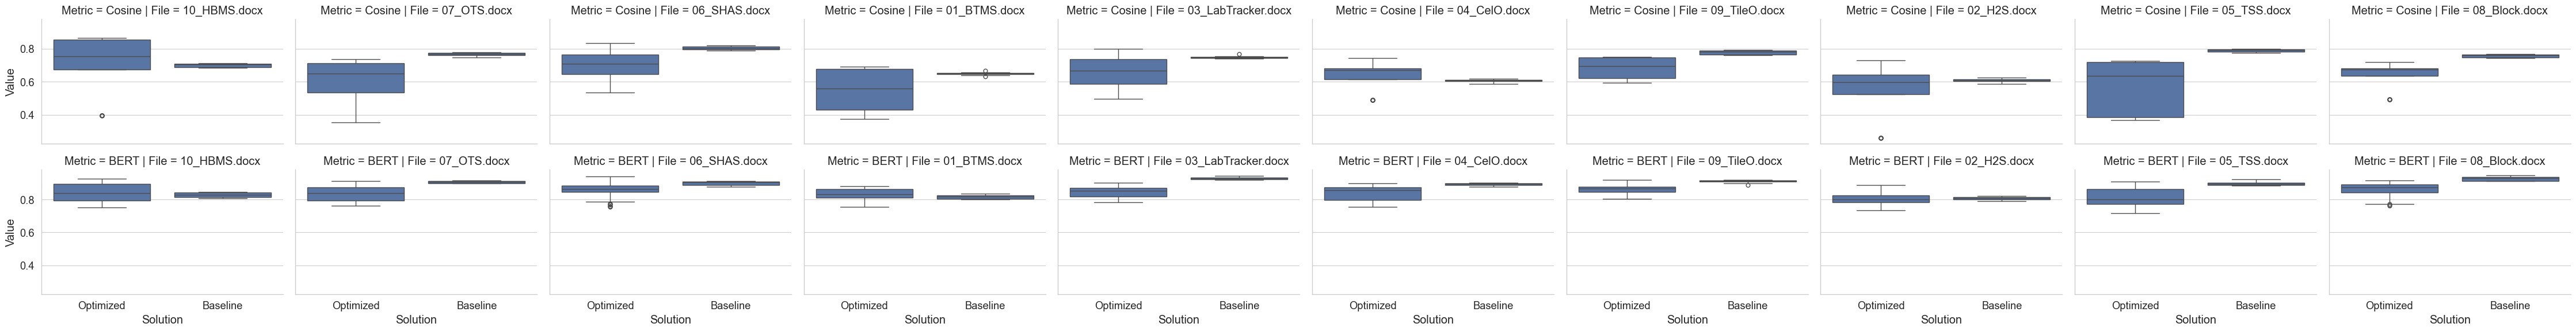

In [11]:
grid = sns.FacetGrid(col='File', row='Metric', data=plot_data, sharey=True, sharex=True, aspect=1.5)
grid.map(sns.boxplot, 'Solution', 'Value')
plt.show()

In [12]:
means = plot_data.groupby(['File', 'Metric', 'Solution']).agg(['mean', 'std'])

In [13]:
means

Value          
                                         mean       std
File               Metric Solution                     
01_BTMS.docx       BERT   Baseline   0.815459  0.012764
                          Optimized  0.829303  0.037390
                   Cosine Baseline   0.647522  0.009353
                          Optimized  0.547337  0.121659
02_H2S.docx        BERT   Baseline   0.805376  0.010316
                          Optimized  0.803816  0.039132
                   Cosine Baseline   0.606487  0.012017
                          Optimized  0.558692  0.148864
03_LabTracker.docx BERT   Baseline   0.927252  0.008912
                          Optimized  0.844863  0.033284
                   Cosine Baseline   0.747958  0.008461
                          Optimized  0.657942  0.101715
04_CelO.docx       BERT   Baseline   0.891602  0.008230
                          Optimized  0.840642  0.044012
                   Cosine Baseline   0.606469  0.008463
                          Optimized  0.644370  0.080070
05_TSS.docx        BERT   Baseline   0.895203  0.012670
                          Optimized  0.811496  0.056776
                   Cosine Baseline   0.788428  0.008242
                          Optimized  0.577603  0.150527
06_SHAS.docx       BERT   Baseline   0.898135  0.012730
                          Optimized  0.857225  0.048742
                   Cosine Baseline   0.802962  0.011497
                          Optimized  0.698289  0.094379
07_OTS.docx        BERT   Baseline   0.903786  0.006431
                          Optimized  0.832801  0.045722
                   Cosine Baseline   0.766642  0.009566
                          Optimized  0.605210  0.130429
08_Block.docx      BERT   Baseline   0.925241  0.013749
                          Optimized  0.858821  0.041777
                   Cosine Baseline   0.756314  0.011094
                          Optimized  0.644903  0.073513
09_TileO.docx      BERT   Baseline   0.907621  0.009789
                          Optimized  0.861977  0.029171
                   Cosine Baseline   0.776786  0.012673
                          Optimized  0.683429  0.064572
10_HBMS.docx       BERT   Baseline   0.825666  0.014496
                          Optimized  0.842603  0.055370
                   Cosine Baseline   0.698770  0.012081
                          Optimized  0.715214  0.162038

In [14]:
results

,File,Solution,Cosine,BERT
0,10_HBMS.docx,0.0,0.853066,0.893256
1,10_HBMS.docx,0.0,0.853066,0.884642
2,10_HBMS.docx,0.0,0.853066,0.888773
3,10_HBMS.docx,0.0,0.853066,0.915135
4,10_HBMS.docx,0.0,0.853066,0.911514
...,...,...,...,...
95,08_Block.docx,Baseline,0.744959,0.925873
96,08_Block.docx,Baseline,0.764077,0.910989
97,08_Block.docx,Baseline,0.741687,0.934255
98,08_Block.docx,Baseline,0.757759,0.911835


## Analysis of the best pareto-solutions

In [27]:
from pingouin import wilcoxon

def compute_win_stat(results, metric):
  sol_stats = {}

  for s in results['Solution'].unique():
      if s == 'Baseline':
        continue
      count = 0
      loss = 0
      tie = 0
      for f in results['File'].unique():
        stat = wilcoxon(
          results[(results['File'] == f) & (results['Solution'] == s)][metric],
          results[(results['File'] == f) & (results['Solution'] == 'Baseline')][metric],
          alternative='greater'
        )
        if stat['p-val'].values[0] < 0.05:
          count += 1
        elif stat['p-val'].values[0] > 0.99:
          loss += 1
        else:
          tie += 1
      sol_stats[s] = { 'win': count, 'tie': tie, 'loss': loss }
  return sol_stats

In [28]:
sol_stats_cosine = compute_win_stat(results, 'Cosine')

In [29]:
sol_stats_cosine

{0.0: {'win': 4, 'tie': 0, 'loss': 6},
 1.0: {'win': 1, 'tie': 0, 'loss': 9},
 2.0: {'win': 1, 'tie': 1, 'loss': 8},
 3.0: {'win': 3, 'tie': 0, 'loss': 7},
 4.0: {'win': 1, 'tie': 1, 'loss': 8},
 5.0: {'win': 4, 'tie': 0, 'loss': 6}}

In [30]:
sol_stats_bert = compute_win_stat(results, 'BERT')

In [31]:
sol_stats_bert

{0.0: {'win': 2, 'tie': 2, 'loss': 6},
 1.0: {'win': 2, 'tie': 1, 'loss': 7},
 2.0: {'win': 1, 'tie': 0, 'loss': 9},
 3.0: {'win': 1, 'tie': 2, 'loss': 7},
 4.0: {'win': 0, 'tie': 0, 'loss': 10},
 5.0: {'win': 3, 'tie': 3, 'loss': 4}}

## Analysis of domain models

In [36]:
def get_best_domain_model(results, metric):
  best = {}
  for f in results['File'].unique():
    count = 0
    for s in results['Solution'].unique():
      if s == 'Baseline':
        continue
      else:
        stat = wilcoxon(
          results[(results['File'] == f) & (results['Solution'] == s)][metric],
          results[(results['File'] == f) & (results['Solution'] == 'Baseline')][metric],
          alternative='greater'
        )
        if stat['p-val'].values[0] < 0.05:
          count += 1
    best[f] = count/len(results['Solution'].unique())
  return best

In [37]:
sol_stats_cosine = get_best_domain_model(results, 'Cosine')

In [38]:
sol_stats_cosine

{'10_HBMS.docx': 0.42857142857142855,
 '07_OTS.docx': 0.0,
 '06_SHAS.docx': 0.14285714285714285,
 '01_BTMS.docx': 0.2857142857142857,
 '03_LabTracker.docx': 0.14285714285714285,
 '04_CelO.docx': 0.7142857142857143,
 '09_TileO.docx': 0.0,
 '02_H2S.docx': 0.2857142857142857,
 '05_TSS.docx': 0.0,
 '08_Block.docx': 0.0}

In [40]:
baseline.describe()

,Cosine,BERT
count,100.000000,100.000000
mean,0.719834,0.879534
std,0.072146,0.045098
min,0.587575,0.787876
25%,0.648020,0.833534
50%,0.746207,0.896776
75%,0.776291,0.911111
max,0.819809,0.946621


In [39]:
sol_stats_bert = get_best_domain_model(results, 'BERT')
sol_stats_bert

{'10_HBMS.docx': 0.42857142857142855,
 '07_OTS.docx': 0.0,
 '06_SHAS.docx': 0.14285714285714285,
 '01_BTMS.docx': 0.42857142857142855,
 '03_LabTracker.docx': 0.0,
 '04_CelO.docx': 0.0,
 '09_TileO.docx': 0.0,
 '02_H2S.docx': 0.2857142857142857,
 '05_TSS.docx': 0.0,
 '08_Block.docx': 0.0}

# RQ3: Prompt Style

In [83]:
def preprocess(cot_ris, cot_baseline):
  create_id(cot_ris)
  cot_ris = pd.concat([cot_ris, cot_baseline])
  cot_ris = pd.melt(cot_ris, id_vars=['Solution'], var_name='Metric', value_name='Value')
  cot_ris.loc[cot_ris['Solution'] != 'Baseline', 'Solution'] = 'Optimized'
  return cot_ris

In [84]:
cot_ris = pd.read_csv('cot/cot-result.csv')
cot_baseline = pd.read_csv('cot/cot-baseline.csv')
cot_ris = preprocess(cot_ris, cot_baseline)

/Users/giord/miniconda3/envs/ds/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


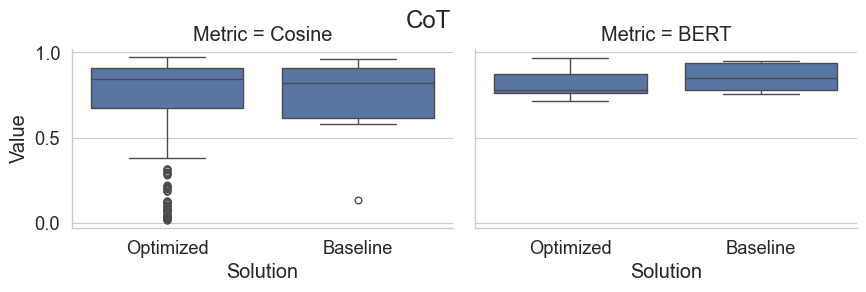

In [90]:
g = sns.FacetGrid(col='Metric', data=cot_ris, sharey=True, sharex=True, aspect=1.5)
g.map(sns.boxplot, 'Solution', 'Value')
g.figure.suptitle('CoT')
plt.show()

In [88]:
few_shot = pd.read_csv('few-shot/fs-results.csv')
few_shot_baseline = pd.read_csv('few-shot/fs-baseline.csv')
few_shot = preprocess(few_shot, few_shot_baseline)

/Users/giord/miniconda3/envs/ds/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


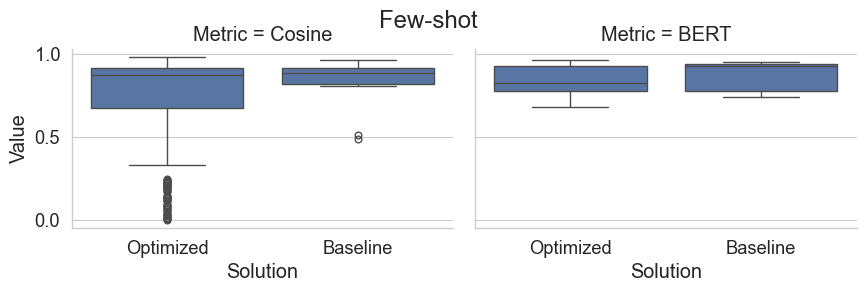

In [92]:
g = sns.FacetGrid(col='Metric', data=few_shot, sharey=True, sharex=True, aspect=1.5)
g.map(sns.boxplot, 'Solution', 'Value')
g.figure.suptitle('Few-shot')
plt.show()